In [1]:
import numpy as np
import pandas as pd
from scipy import signal, fft
from scipy.signal import find_peaks
import matplotlib.pyplot as plt


def sine_generator(fs, sinefreq, duration):
    T = duration
    nsamples = fs * T
    w = 2. * np.pi * sinefreq
    t_sine = np.linspace(0, T, nsamples, endpoint=False)
    y_sine = np.sin(w * t_sine)
    result = pd.DataFrame({'data' : y_sine} ,index=t_sine)
    return result

def rand_generator(fs, duration):
    T = duration
    nsamples = fs * T
    t_val = np.linspace(0, T, nsamples, endpoint=False)
    y_val = np.random.uniform(size=nsamples)
    result = pd.DataFrame({'data' : y_val} ,index=t_val)
    return result

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [9]:
from ECG.ecg import read_ecg,make_df_summary
events = 4000
eventsr = 4*events
file  = "a01.dat"
filer  = "a01r.dat"
# file  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01.dat")
# filer  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01r.dat")
y = read_ecg(file,0,events)
yr = read_ecg(filer,0,eventsr)

respA = yr[1::4]
respA

array([-6892, -6910, -6928, ..., -2924, -2973, -3022])

In [10]:

# plt.figure(figsize=(12,8))
# plt.subplot(211)
# plt.plot(range(len(respA)),np.abs(fft(respA)))
# plt.title('fft respA')

Text(0.5, 1.0, 'respA')

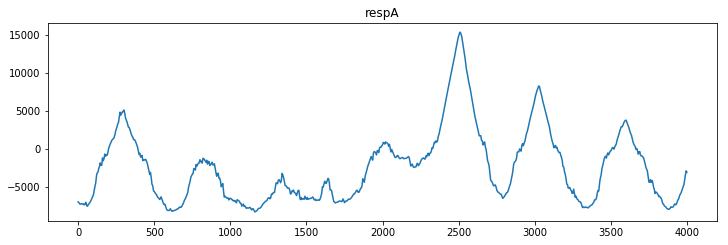

In [11]:

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(range(len(respA)),respA)
plt.title('respA')

In [5]:
fps = 100


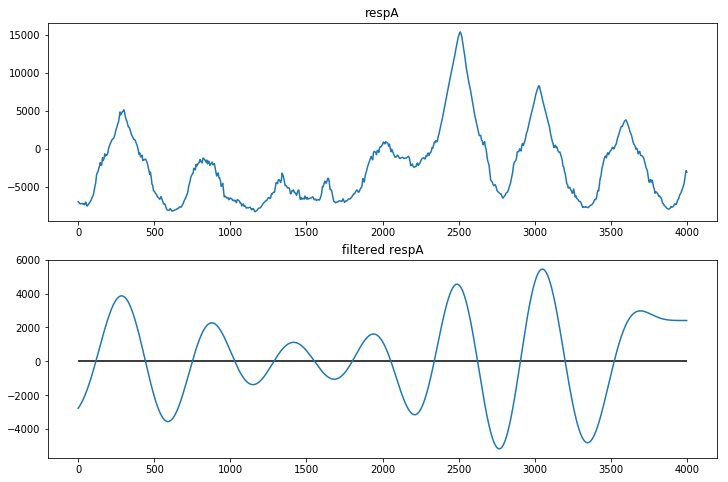

In [23]:

Filtered = butter_highpass_filter(respA,0.1,fps)
Filtered = butter_lowpass_filter(Filtered,0.2,fps)

# Filtered = butter_lowpass_filter(respA,1/2,fps)

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(range(len(respA)),respA)
plt.title('respA')
plt.subplot(212)
plt.plot(range(len(Filtered)),Filtered)
plt.title('filtered respA')
plt.hlines(y=0,xmin = 0,xmax=events)
plt.show()

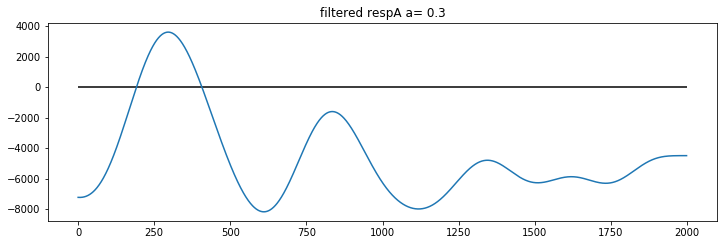

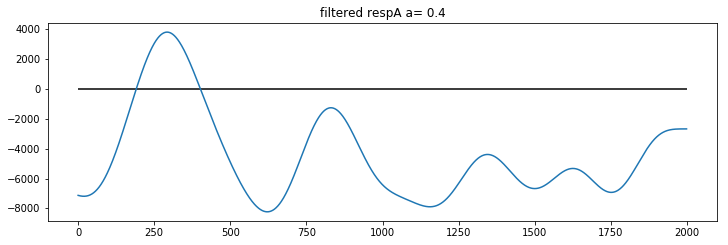

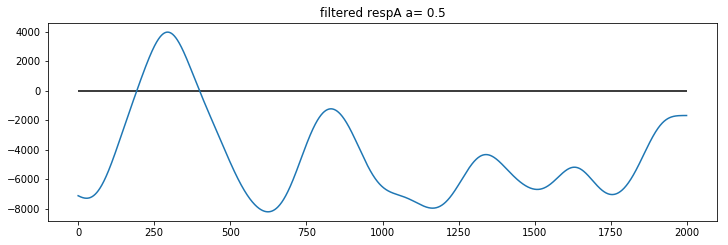

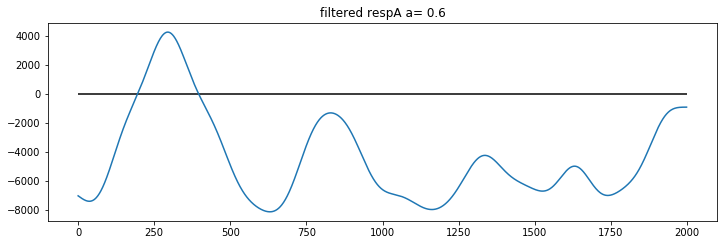

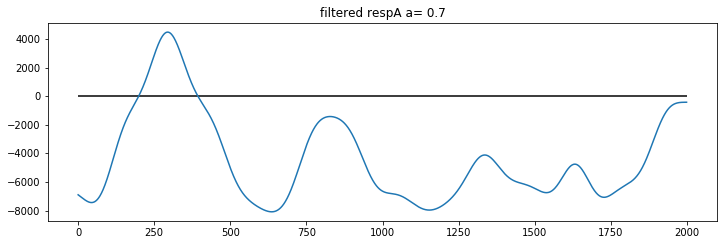

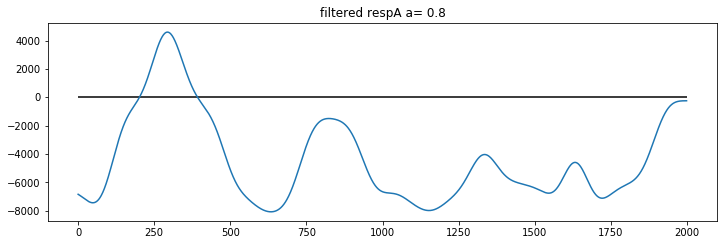

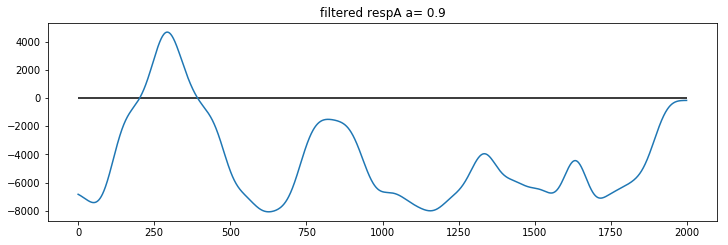

In [174]:
# for i in range(3,10):
#     a = i/10

#     Filtered = butter_highpass_filter(respA,a-0.05,fps)
#     Filtered = butter_lowpass_filter(respA,a+0.05,fps)

# # Filtered = butter_lowpass_filter(respA,1/2,fps)

#     plt.figure(figsize=(12,8))
# # plt.subplot(211)
# # plt.plot(range(len(respA)),respA)
# # plt.title('respA')
#     plt.subplot(211)
#     plt.plot(range(len(Filtered)),Filtered)
#     plt.title(f'filtered respA a= {a}')
#     plt.hlines(y=0,xmin = 0,xmax=events)
#     plt.show()